In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()

%matplotlib inline

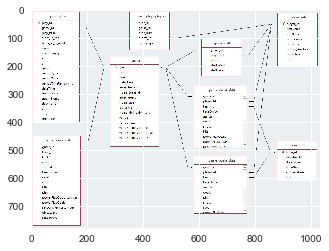

In [2]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [3]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [4]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [5]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [6]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [7]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


# Lets look at some stats for faceoff wins, hits, goals

In [8]:
#merge the game home_team_id to the game_plays
game_and_stats = pd.merge(game, game_teams_stats, on = 'game_id', how='outer')
game_and_stats = pd.merge(game_and_stats, team_info, on = 'team_id', how='inner')

In [9]:
#Find stats for home wins, losses and away wins and losses by team

In [10]:
game_and_stats['game_category'] = 'NA'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Home Win'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] < game_and_stats['away_goals']),'game_category'] = 'Home Loss'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['away_goals'] > game_and_stats['home_goals']),'game_category'] = 'Away Win'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Away Loss'

In [11]:
game_and_stats.columns

Index(['game_id', 'season', 'type', 'date_time', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz', 'team_id', 'HoA', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link', 'game_category'],
      dtype='object')

In [12]:
df = game_and_stats.groupby(['teamName','game_category']).agg({'home_goals':['std','mean'],
                                                        'away_goals':['std','mean'],
                                                       'shots':['std','mean'],
                                                       'hits':['std','mean'],
                                                        'powerPlayOpportunities':['std','mean'],
                                                        'powerPlayGoals':['std','mean'],
                                                       'faceOffWinPercentage':['std','mean'],
                                                       'giveaways':['std','mean'],
                                                       'takeaways':['std','mean']})

In [40]:
df

home_goals           away_goals            \
                                  std      mean        std      mean   
teamName     game_category                                             
Avalanche    Away Loss       1.451183  3.978873   1.041541  1.633803   
             Away Win        1.107267  1.763441   1.160153  3.623656   
             Home Loss       1.179189  1.858407   1.324786  3.938053   
             Home Win        1.393278  3.902439   1.131027  1.821138   
Blackhawks   Away Loss       1.327240  3.953125   1.207318  1.695312   
             Away Win        1.106801  1.826087   1.437510  3.811594   
             Home Loss       1.190196  1.760000   1.394470  3.430000   
             Home Win        1.443697  3.892857   1.095116  1.684524   
Blue Jackets Away Loss       1.331595  3.822581   1.034673  1.774194   
             Away Win        1.153254  1.921053   1.305435  3.728070   
             Home Loss       1.128741  1.842593   1.182543  3.851852   
             Home Win        1.552419  3.891473   1.129191  1.697674   
Blues        Away Loss       1.549095  3.782609   1.218157  1.617391   
             Away Win        1.231346  1.604317   1.449817  3.683453   
             Home Loss       1.101525  1.636364   1.231752  3.747475   
             Home Win        1.365803  3.681818   1.056686  1.603896   
Bruins       Away Loss       1.261807  3.766667   1.143855  1.950000   
             Away Win        1.024589  1.571429   1.391107  3.669173   
             Home Loss       1.158568  1.970874   1.371711  3.737864   
             Home Win        1.411886  3.720779   1.030558  1.506494   
Canadiens    Away Loss       1.440332  3.859375   1.055049  1.570312   
             Away Win        1.215601  1.851240   1.367620  3.719008   
             Home Loss       1.190339  1.580357   1.422126  3.616071   
             Home Win        1.454956  3.715328   1.051078  1.496350   
Canucks      Away Loss       1.436852  3.914286   1.151075  1.685714   
             Away Win        1.115396  1.638298   1.131080  3.574468   
             Home Loss       1.072356  1.669355   1.272348  3.782258   
             Home Win        1.387090  3.627273   1.108614  1.618182   
Capitals     Away Loss       1.428858  3.717742   1.143288  1.838710   
             Away Win        1.127326  1.950000   1.328400  3.928571   
...                               ...       ...        ...       ...   
Predators    Home Loss       1.228627  1.723810   1.416801  3.619048   
             Home Win        1.311185  3.913907   1.158823  1.807947   
Rangers      Away Loss       1.417037  3.767442   1.229778  1.837209   
             Away Win        1.103052  1.642336   1.509168  3.635036   
             Home Loss       1.249282  1.798246   1.488480  3.798246   
             Home Win        1.317366  3.721854   1.016117  1.576159   
Red Wings    Away Loss       1.415245  3.863309   1.179801  1.776978   
             Away Win        1.198678  1.759259   1.161090  3.583333   
             Home Loss       1.056913  1.679688   1.313823  3.421875   
             Home Win        1.390885  3.763158   1.229963  1.789474   
Sabres       Away Loss       1.273643  3.794872   1.092477  1.660256   
             Away Win        1.053370  1.876712   1.179963  3.493151   
             Home Loss       1.102000  1.548611   1.345804  3.583333   
             Home Win        1.206077  3.611765   1.066684  1.870588   
Senators     Away Loss       1.396663  3.857143   1.223674  1.778571   
             Away Win        1.178732  1.777778   1.427369  3.666667   
             Home Loss       1.212418  2.025000   1.502356  3.941667   
             Home Win        1.358462  3.688000   1.213473  1.792000   
Sharks       Away Loss       1.393705  3.817460   1.082062  1.738095   
             Away Win        1.091892  1.727273   1.194748  3.674242   
             Home Loss       1.276872  1.819048   1.362233  3.676190   
             Home Win        1.507834  3.830065   1.082311  1.53594

In [41]:
corr = df.groupby('game_category').corr()

In [48]:
def make_mask(data):
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    return mask

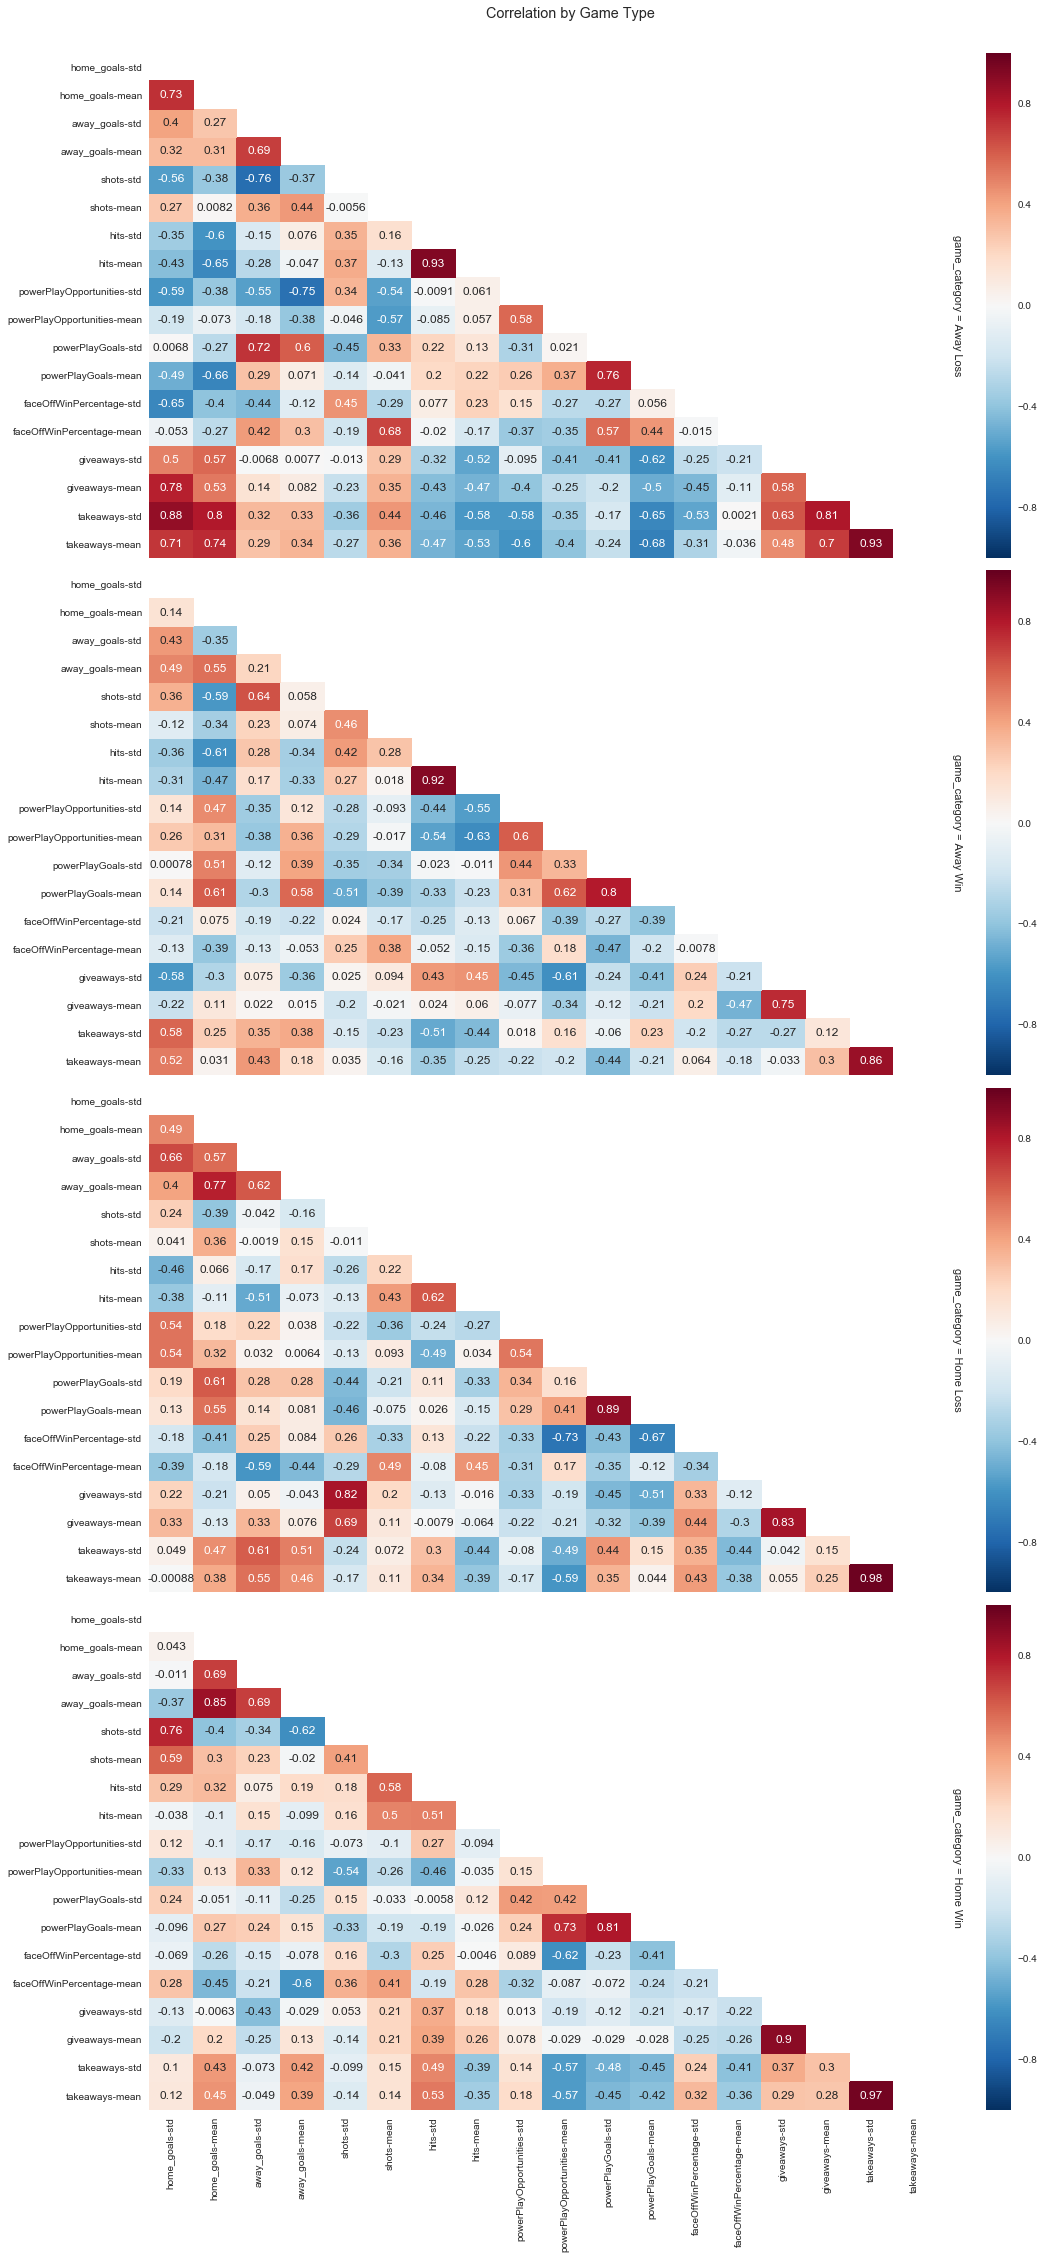

In [57]:
sns.set(style = 'white')
g = sns.FacetGrid(corr.reset_index(), row = "game_category", margin_titles=True, size=8, aspect=2)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0, mask=make_mask(data.corr()),annot=True))
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Correlation by Game Type')

pass

In [ ]:

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby('teamName').agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})
goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [ ]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName','year'], var_name='var_name')

In [ ]:
#Penguins Advantage by Year
sns.boxplot(x="faceOffWinPercentage", y="game_category",
            hue="teamName",
            data=df.reset_index()[['teamName','faceOffWinPercentage'['mean']])
pass

In [ ]:
#merge the game home_team_id to the game_plays
game_plays = pd.merge(game_plays, game, on = 'game_id')

In [ ]:
#merge the game home_team_id to the game_plays
game_plays = pd.merge(game_plays, game, on = 'game_id')

In [ ]:
#My computer cannot process this command - Out of Memory Error
#game_plays = pd.merge(game_plays, game_plays_players, on = 'play_num', how = 'outer')

In [ ]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

#Convert a column to a datetime object
game_plays_position['dateTime'] = pd.to_datetime(game_plays_position['dateTime'])
#Create column of years from datetime Series
game_plays_position['year'] = game_plays_position['dateTime'].dt.year

In [ ]:
game_plays_position.head()

In [ ]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [ ]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']

In [ ]:
game_plays_goals.columns

In [ ]:
game_plays_goals.head()

In [ ]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

In [ ]:
game_plays_position.head()

# Create home goals vs away goals by team

In [ ]:
game_plays_position.columns

In [ ]:
#By season, by game_id
season_scores = game_plays_position.groupby(['year', 'game_id'])[['goals_home', 'goals_away']].max()
season_scores.groupby('year')[['goals_home', 'goals_away']].mean()

In [ ]:
import re

In [ ]:
# #Goals by Sidney Crosby Only
# crosby_goals = game_plays_goals[game_plays_goals['description'].str.contains("Crosby", na=False)]

# #Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
# reg_time_crosby = crosby_goals[crosby_goals['period'] <=3]
# crosby_ot_goals = crosby_goals[crosby_goals['period'] > 3]

# #Goals by Crosby at home vs away
# reg_time_crosby_home = reg_time_crosby[reg_time_crosby['home_team_id']==reg_time_crosby['team_id_for']]
# reg_time_crosby_away = reg_time_crosby[reg_time_crosby['away_team_id']==reg_time_crosby['team_id_for']]

# #How about goals?
# sns.set(style = 'white')
# sns.jointplot('x', 'y', data=reg_time_crosby_home, kind="hex")
# sns.jointplot('x', 'y', data=reg_time_crosby_away, kind="hex")
# sns.jointplot('x', 'y', data=crosby_ot_goals, kind="hex")

# #sns.kdeplot(reg_time_crosby_home['x'], reg_time_crosby_home['y'], kind='hex')
# #sns.kdeplot(reg_time_crosby_away['x'], reg_time_crosby_away['y'])



# #sns.kdeplot(crosby_ot_goals['x'], crosby_ot_goals['y'])

# #This took forever to run on my computer but eventually showed up!

# #g = sns.FacetGrid(reg_time_crosby, col = "year", row = 'period', margin_titles=True)
# #g.map(sns.kdeplot, 'x', 'y')

# #plt.subplots_adjust(top=0.9)
# #g.fig.suptitle('Player Position When Scoring Regular time')


In [ ]:
#Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
reg_time = game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position When Scoring Regular time')

#We can iterate through the various subplots to change labels and titles if we want

#axes = g.axes.flatten()
#axes[1].set_title('Player Position When Scoring Regular time')
#axes[1].set_ylabel('Y coordinate')
#axes[1].set_xlabel('X coordinate')

# It will be necessary to figure out how to identify the scoring team for each play.  I think thats in the gameshifts table and we can join on home team with the list of players scoring or with a regex expression

In [ ]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby('teamName').agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})
goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [ ]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName'], var_name='goal_differential')

#Create a plot of team & goal differentials
sns.set(style = 'white')
ax = sns.pointplot(x="value", y="teamName", hue = "teamName", data=df_long, join=False)
ax.set(xlabel='Home vs Away Goal Differential', ylabel='Team Name', title = 'Home Team Advantage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pass

# What if we look for advantage by year?

In [ ]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['teamName','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [ ]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName','year'], var_name='var_name')

In [ ]:
sns.set(style = 'white')
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":14}) 
g = sns.FacetGrid(df_long, col = "year", margin_titles=True)
g.map(sns.pointplot, 'value', 'teamName')
plt.subplots_adjust(top=0.77)
g.fig.suptitle('Home Team Advantage by Season')

pass

In [ ]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, row = "teamName", margin_titles=True)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.97)
g.fig.suptitle('Home Team Advantage by Season')
pass

In [ ]:
#Penguins Advantage by Year
sns.boxplot(x="year", y="value",
            hue="teamName",
            data=df_long[(df_long['teamName']=='Penguins') | (df_long['teamName']=='Bruins') | (df_long['teamName']=='Blackhawks')])
pass

# How does the advantage work out when we examine different venues

In [ ]:
#We will now look at differences in time zones
venue_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='home_team_id', right_on='team_id')

#Add in the venue of the away team as well
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='away_team_id', right_on='team_id')


In [ ]:
#Find the venue for each team
venue_by_team = venue_by_team.groupby(['teamName','venue_time_zone_offset']).sum().reset_index()[['teamName','venue_time_zone_offset']]

In [ ]:
goals_by_team = pd.merge(goals_by_team, venue_by_team, left_on='teamName', right_on='teamName')

In [ ]:
goals_by_team['timezone_diff'] = goals_by_team['venue_time_zone_offset_x'] - goals_by_team['venue_time_zone_offset_y']

In [ ]:
#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['timezone_diff','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [ ]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['timezone_diff','year'], var_name='var_name')

In [ ]:
df

In [ ]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, row = "timezone_diff", margin_titles=True)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.97)
g.fig.suptitle('Home Team Advantage by Season')
pass

In [ ]:
goals_by_team.columns

In [ ]:
home_goals_by_team = goals_by_team[goals_by_team['home_team_id']==goals_by_team['team_id_for']]
away_game_plays_goals = goals_by_team[goals_by_team['away_team_id']==goals_by_team['team_id_for']]

In [ ]:
#Split into home and away goals
home_game_plays_goals = game_plays_goals[game_plays_goals['home_team_id']==game_plays_goals['team_id_for']]
away_game_plays_goals = game_plays_goals[game_plays_goals['away_team_id']==game_plays_goals['team_id_for']]

In [ ]:
home_game_plays_goals.head()

In [ ]:
home_game_plays_goals.columns

In [ ]:
#Let's look at where all the Goals have occurred on the ice FOR HOME TEAM
home_reg_time = home_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(home_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Player Position When Scoring Regular time')
pass

In [ ]:
#Let's look at where all the Goals have occurred on the ice FOR AWAY TEAM
away_reg_time = away_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(away_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Away Player Position When Scoring Regular time')
pass

In [ ]:
who

In [ ]:
#Goalie Stats Correlation Heatmap
c = game_goalie_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

In [ ]:
#Player Stats Correlation Heatmap
c = game_skater_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

In [ ]:
#ax = sns.heatmap((game_plays_goals['x'], game_plays_goals['y']))

In [ ]:
#Let's see what variables are out here
%who

In [ ]:
#Where do hits occur on the ice
ax = sns.jointplot('x', 'y', data=game_plays_position, kind="hex")
ax.set_title('Player Position When Hitting')
ax.set_ylabel('Y coordinate')
ax.set_xlabel('X coordinate')

In [ ]:
#How about goals?
sns.jointplot('x', 'y', data=game_plays_goals, kind="hex")

The above graph is assymetrical along the y axis.  It would appear that there is some bias in terms of handedness?

In [ ]:
#Test this line
#sns.jointplot('x', 'y', data=game_plays_position, kind="kde")

# This linke has some nice visualizations we could try 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Heat maps:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#Just plot 1000 points because it takes forever
#This visualization style could be good but I can't get this to work correctly
g = sns.heatmap([game_plays_position[:1000]['x'], game_plays_position[:1000]['y']])

In [ ]:
#Not working correctly

#g = sns.JointGrid('x','y', data = game_plays_position)
#g = g.plot_joint(plt.scatter, color='0.5', edgecolor='white')
#g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#g = g.plot_marginals(sns.kdeplot, shades=True)

In [ ]:
skater_team.groupby('teamName').mean()['shots']

In [ ]:
#Group by team
by_team = skater_team.groupby('teamName').mean()
plt.hist(skater_team.groupby('teamName').mean()['shots'])#.plot(legend=True)

In [ ]:
g = sns.stripplot(x='nationality', y = 'shots', data=skater_team)

In [ ]:
g = sns.boxplot(x='shots', y='nationality', data=skater_team)

In [ ]:
#Group skaters by nationality
by_country = skater_team.groupby('nationality').mean()
skater_team.groupby('nationality').mean()['shots'].plot(legend=True)


In [ ]:
plt.scatter(by_country['shots'],by_country['goals'])

In [ ]:
goalie_team.hist('powerPlaySaves')

In [ ]:
plt.scatter(goalie_team['shots'], goalie_team['saves'])

In [ ]:
game_goalie_stats.head()